# Proyecto de Reconocimiento Dígitos 
## Con Redes Neuronales Convolutivas

![CIC IPN](https://th.bing.com/th/id/R.d7c4342f0c034ea4f25db1dd8cfd7df6?rik=ksoCSLNKbEjicA&riu=http%3a%2f%2fcittecam.org.mx%2fwp-content%2fuploads%2f2016%2f10%2fcic.jpg&ehk=NZh78qyIYMEqvWNeceBAkwe9MrgYS6gvpiLWVnZecWc%3d&risl=&pid=ImgRaw&r=0)

> **Curso de Machine Learning (Julio 2023)** 
>
> Profesor: [Alan Badillo Salas](mailto:alan@nomadacode.com)
>
> Github: [https://github.com/dragonnomada/ml-2023](https://github.com/dragonnomada/ml-2023)
>

## Contenido

* **Fase 1** - Adquisición de las imágenes de aprendizaje de MNIST
* **Fase 2** - Visualización de los dígitos escritos a mano de entrenamiento
* **Fase 3** - Construcción de la red neuronal para el aprendizaje
* **Fase 4** - Visualización de los dígitos escritos a mano de prueba
* **Fase 5** - Creación de una matriz que representa un dígito escrito a mano
* **Fase 6** - Crear una aplicación para dibujar dígitos escritos a mano y reconocerlos

## Introducción

El auge de la Inteligencia Artificial ha sido gracias a la popularidad que han tenido las redes neuronales dentro del sector empresarial y científico. Su popularización ha puesto en manifiesto la necesidad de dominar dicho campo para incorporarlo en estudios científicos de alto impacto, así como también en el desarrollo tecnológico que mejore la calidad de vida humana y guie su desarrollo a una mejor era.

Dentro de las redes neuronales artificiales, podemos encontrar distintos enfoques e implementaciones que permiten resolver una inmensa cantidad de problemas. Por ejemplo, problemas genéricos, en dónde una entrada detetermina una salida y esta es aprendida por una red neuronal artificial (ANN - Artificial Neural Network).

En el campo de la inteligencia artificial se ha desarrollado un subcampo llamado *aprendizaje profundo*, basado en perfeccionar las redes neuronales en dos problemas principales:

* `Reconocimiento de Textos` - Por ejemplo, *CHAT GPT* que es capaz de analizar el lenguaje natural y generar una conversación fluida con los usuarios, superando pruebas rigurosas como resolver exámenes médicos y matemáticos.
* `Procesamiento de Imágenes` - Por ejemplo, *DALL-E* que es capaz de generar imágenes a partir de texto, identificando los elementos dentro de la foto y adaptándolos a lo que se le solicita.

Estas dos tareas han sido posibles gracias a las redes neuronales recurrentes (RNN - Recurrent Neural Network) y las redes neuronales convolutivas (CNN - Convolutional Neural Network).

En este proyecto usaremos las redes neuronales convolutivas (CNN) para poder entrenar un modelo capaz de **aprender a reconocer dígitos escritos a mano**, para así generar una aplicación de escritorio que nos permita dibujar un dígito y reconocerlo.

Este proyecto es parte del **Curso de Machine Learning** del *Centro de Investigación en Computación* del *Instituto Politécnico Nacional* de *México*, impartido por el matemático *Alan Badillo Salas*.

El material generado en estas notas utiliza la librería de [*Keras*](https://keras.io) de [*Tensorflow*](https://www.tensorflow.org/) y sigue la guía de ejemplo para entrenar un modelo usando redes neuronales convolucionales descrita en: [https://keras.io/examples/vision/mnist_convnet/](https://keras.io/examples/vision/mnist_convnet/).

El código para la aplicación de escritorio utiliza la librería de [*Tkinter*](https://docs.python.org/3/library/tkinter.html) la cual permite generar aplicaciones simples para python y crear un *canvas* de dibujo. El código es autoría del instructor y cedido al *Instito Politécnico Nacional* para fines educativos.

## **Fase 1** - Adquisición de las imágenes de aprendizaje de MNIST

`MNIST` es un conjunto de 70,000 imágenes de dígitos escritos a mano de tamaño 28x28 pixeles, que se encuentra disponible en [http://yann.lecun.com/exdb/mnist/](http://yann.lecun.com/exdb/mnist/) y es parte de los conjuntos de datos oficiales de *Keras*, por lo que puede ser cargado directamente desde `keras.datasets`.

Las imágenes están divididas en 60,000 de entrenamiento y 10,000 de pruenbas, asociadas a sus etiquetas correctas.

### Instalamos la librería de *Tensorflow*

In [ ]:
# ! pip install tensorflow

### Importamos las imágenes de *MNIST* como matrices de entrenamiento y pruebas

In [49]:
from keras.datasets import mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

La dimensión que tendrá la matriz de entrenamiento `X_train` es de *60,000* imágenes de 28x28 pixeles, representada por una matriz de 60,000x28x28.

El vector objetivo de entrenamiento `Y_train` tendrá una dimensión de *60,000*, dónde cada entrada será un entero entre `0` y `9` representando el dígito que se debe aprender.

In [52]:
print("X_train:", X_train.shape) # 60,000x28x28 (3-dimensiones)
print("Y_train:", Y_train.shape) # 60,000       (1-dimensión)

X_train: (60000, 28, 28)
Y_train: (60000,)


## **Fase 2** - Visualización de los dígitos escritos a mano de entrenamiento

## Seleccionamos la primer imágen de entrenamiento para su visualización

Podemos seleccionar una imagen de entrenamiento, de la matriz de `X_train` con algún índice entre `0` y `59,999`, por ejemplo, `X_train[499]` representará la *500-va* imagen de entrenamiento, devolviendo una matriz de `28x28`.

x:  (28, 28)
y_0 =  5


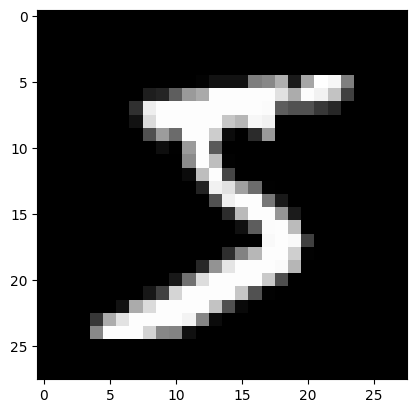

In [56]:
# Recuperamos la imagen de entrenamiento con índice 0
# Esta está representada como una matriz de 28x28 con valores entre 0 y 255
x = X_train[0]

print("x: ", x.shape)    # (28, 28)

# Mostramos el valor del objetivo asociado al índice 0
# Está representado por un número entero entre 0 y 9
print("y_0 = ", Y_train[0]) # 5

# Importamos la librería de Matplotlib para dibujar la matriz `x`
import matplotlib.pyplot as plt

# Mostramos la matriz `x` en forma forma de imagen, usando escala de grises 
plt.imshow(x, cmap=plt.get_cmap('gray'))

# Pinta el resultado
plt.show()

## **Fase 3** - Construcción de la red neuronal para el aprendizaje

### Preparamos los datos de entrenamiento para la red neuronal

Antes de crear la red neuronal, necesitamos establecer cómo será la entrada de la red neuronal, en este caso una matriz de `28x28x1`, esto con el fin de aprender 28x28 dimensiones en 1 entrada singular.

Esto es requerido así por la red neuronal convolutiva, ya que tomará cada imagen como el **input** directo de la red neuronal, y debemos adaptar las dimensiones de `28x28 -> 28x28x1`.

In [57]:
# Importamos Keras y Numpy
import keras
import numpy as np

# Definimos cuántas clases de aprendizaje habrán
# Con el fin de poder codificar las clases categóricas a arreglos esparcidos (sparse vector)
# Por ejemplo, si la categoría es 5, haría la transformación:
# 5 -> [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# Indicando que está activa la categoría 5, en lugar de manejar un número escalar entero
# Entonces la red neuronal aprenderá si una matriz de [... 28x28x1 ...] produce un vector de [... 10 ...]
# Donde el vector 1, si se activa la categoría o 0 si no lo hace.
num_classes = 10

# Definimos la dimensión de entrada, es decir, la red neuronal espera una matriz de 28x28x1
input_shape = (28, 28, 1)

# Corregimos las matrices de entrenamiento y pruebas X_train y X_test
# Para que en lugar de tener valores entre 0 y 255, tengan valores entre 0 y 1
# Y además ponemos un tipo de dato ligero como flotante a 32 bits
x_train = X_train.astype("float32") / 255
x_test = X_test.astype("float32") / 255

# Corregimos la dimensión de las matrices de entrenamiento y pruebas x_train y x_test 
# De una dimensión de (28, 28) a una dimensión de (28, 28, 1)
# con la finalidad que esta matriz pueda ingresar a la matriz según el `input_shape` definido
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("X_train shape:", X_train.shape) # (60000, 28, 28)
print("x_train shape:", x_train.shape) # (60000, 28, 28, 1)

# Convetimos el vector Y_train de 60,000 valores objetivos a 60,000x10 objetivos
# Cada valor de `y` ahora será un vector de 10 entradas, dónde será 1 si se activa la categoría
# Por ejemplo, si  y = 4 -> [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
y_train = keras.utils.to_categorical(Y_train, num_classes)
y_test = keras.utils.to_categorical(Y_test, num_classes)

print("Y_train:", Y_train.shape)
print("Y_test:", Y_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train shape: (60000, 28, 28)
x_train shape: (60000, 28, 28, 1)
Y_train: (60000,)
Y_test: (10000,)
y_train: (60000, 10)
y_test: (10000, 10)


## Definimos el modelo de la Red Neuronal Convolutiva de Keras

La red neuronal cpnvolutiva (CNN - Convolutional Neural Network), es capaz de tomar entradas matriciales, como imágenes completas, para permitir a través de una serie de capaz enlazadas, formar piscinas de **kernels** que reconozcan sub-partes específicas en la matriz (imagen), y puedan aprender a reconocer estas sub-partes.

Podemos imaginar los `kernel` como fragmentos codificados con las principales características que se encuentran en una región, por ejemplo, un pedazo de ojo, un pedazo de oreja, un pedazo de dígito, etc. Así, la red neuronal es capaz de identificar si estos trozos de información están presente y cuáles son los más representativos para tomar la decisión de que cierta imagen de entrada pertenece a cierta categoría. 

Por ejemplo, si la imagen posee un pedazo de dígito redondeado a la derecha podría ser un `8` o `0`, pero si a parte tiene una pequeña protuberancia podría ser `9` quizás.

In [58]:
# Importamos las capas de Keras, en este caso usaremos una capa Conv2D en lugar de una capa Densa
# como lo haríamos en una red neuronal artificial genérica (ANN)
from keras import layers

# Construimos el modelo como una secuencia de capas que tomarán la entrada y su salida la conectarán
# a la siguiente capa.
model = keras.Sequential(
    [
        # La primera capa siempre es la capa de entrada, en este caso
        # la capa está diseñada para recibir muestras de `28x28x1` según el `input_shape`
        keras.Input(shape=input_shape),
        # La segunda capa será una capa convolucional 2D, 
        # con la función de activación ReLU (rectificador lineal)
        # con 32 neuronas organizadas con kernels de 3x3 (regiones de aprendizaje)
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        # La siguiente capa será una piscina 2D con subregiones de 2x2 (filtrado)
        layers.MaxPooling2D(pool_size=(2, 2)),
        # La siguiente capa repite una capa convolucional 2D,
        # con la función de activación ReLU (rectificador lineal)
        # tomando ahora 64 neuronas de con kernels de 3x3 (regiones de aprendizaje)
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        # La siguiente capa repite una piscina 2D con subregiones de 2x2 (filtrado)
        layers.MaxPooling2D(pool_size=(2, 2)),
        # La siguiente capa aplanará la salida anterior para transformarla en un arreglo lineal
        layers.Flatten(),
        # La siguiente capa definirá pequeñas variaciones y resetos aleatorio 
        # a las entradas para evitar un sobre ajuste,
        # esto significa que bajo la razón de 0.5 (50%) hará algunos reseteos aleatorios 
        # y variaciones sobre la salida anterior (la entrada siguiente), para evitar
        # que la red neuronal se sobreajuste a los valores de entrenamiento
        # y simular variaciones aleatorias en los datos de aprendizaje
        layers.Dropout(0.5),
        # La última capa es una capa Densa (del tipo ANN) que aprenderá
        # que la salida anterior (la de la capa aplana con variaciones y reseteos aleatorios)
        # deberá convertirse en `10` salidas, cada una representando si se activa o no
        # una clase, por lo que la función de activación será `SoftMax` (Máximo suavizado)
        layers.Dense(num_classes, activation="softmax"),
    ]
)

# Mostramos el resumen del modelo
# Para observar cuántos parámetros tiene que ajustar al final 
# (34,826 pesos necesita ajustar)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1600)             

### Entrenamos el modelo (la red neuronal convolutiva) en varias épocas y lotes

El entrenamiento se da en épocas (por ejemplo `4`), en las que en cada época se busca aprender un lote aleatorio de muestras de entrenamiento (por ejemplo `128`), entonces se formarán lotes aleatorios de las 60,000 imágenes de entrenamiento y se aplicarán los lotes varias veces por época.

Esto producirá que la red neuronal vaya siendo cada vez más precisa hasta llegar a su precisión final.

En nuestro caso cada época entrena `422` lotes de `128` muestras (aprende `54,016` imágenes por época).

Llegando a una exactitud téorica de `0.9782` (`97.82%`).

Con 15 épocas logra `99%` de precisión, pero tarda mucho más en entrenarse y consume bastante `CPU`.

In [59]:

# Definimos el número de épocas que repetiremos el aprendizaje
epochs = 4
# Definimos el tamaño de los lotes de muestras
batch_size = 128

# Compilamos el modelo utilizando el optimizador `ADAM` con la
# función que mide la pérdida entre la salida esperada y la resultante
# llamada `CATEGORIAL CROSS ENTROPY`
# Y establece mostrar las métricas de precisión/exactitud
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Entrenamos el modelo con las matrices de entrenamiento
# x_train (60000, 28, 28, 1)
# y_train (60000, 10)
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/4
422/422 [==============================] - 16s 36ms/step - loss: 0.3624 - accuracy: 0.8914 - val_loss: 0.0835 - val_accuracy: 0.9785
Epoch 2/4
422/422 [==============================] - 15s 35ms/step - loss: 0.1143 - accuracy: 0.9649 - val_loss: 0.0595 - val_accuracy: 0.9842
Epoch 3/4
422/422 [==============================] - 15s 35ms/step - loss: 0.0870 - accuracy: 0.9730 - val_loss: 0.0514 - val_accuracy: 0.9850
Epoch 4/4
422/422 [==============================] - 14s 34ms/step - loss: 0.0703 - accuracy: 0.9782 - val_loss: 0.0405 - val_accuracy: 0.9900


### Calculamos la precisión del modelo usando las muestras de pruebas

Para validar que tan bien clasifica el modelo, usamos los datos de entrenamiento, que contienen 1,000 imágenes que reservamos para las pruebas.

Esto determinará cuántas muestras de pruebas estuvieron bien clasificadas, obteniendo un `98.7%` de presición (bastante bueno para un entrenamiento con solo `4` épocas de entrenamiento).

In [61]:
# Obtenemos las puntuaciones de pérdida (loss) y precisión (accuracy) 
score = model.evaluate(x_test, y_test, verbose=0)

# Mostramos los resultados
print("Pérdida (loss):", score[0])
print("Precisión (accuracy):", score[1])

Pérdida (loss): 0.03955768793821335
Precisión (accuracy): 0.9869999885559082


## Guardamos el modelo y sus pesos ya entrenados para no perderlos

Podemos guardar el modelo y sus pesos para recuperarlos en cualquier momento y usar la red neuronal para predecir muestras, sin tener que hacer el entrenamiento nuevamente.

In [62]:
# Guardamos la información del modelo (ligero - ocupa poca memoria)
model.save("digits_net_model")
# Guardamos la información de los pesos entrenados (pesado - ocupa mucha memoria)
model.save_weights("digit_net_weights")

INFO:tensorflow:Assets written to: digits_net_model\assets


INFO:tensorflow:Assets written to: digits_net_model\assets


### Recuperamos el modelo guardado para garantizar que funcione

Validamos que el modelo guardado sea capaz de predecir nuevamente las muestras de pruebas

In [64]:
# Cargamos el modelo de la red neuronal convolutiva (CNN) almacenada
model2 = keras.models.load_model("digits_net_model")

model2.summary()

# Cargamos los pesos de entrenamiento que guardamos (los pesos tras el entrenamiento)
model2.load_weights("digit_net_weights")

# Ahora este modelo debería funcionar igual que el original
score = model2.evaluate(x_test, y_test, verbose=0)

# NOTA: Ahora podemos cerrar todo y ejecutar desde aquí ya sin hacer el entrenamiento nunca más

# Mostramos los resultados
print("Pérdida (loss):", score[0])
print("Precisión (accuracy):", score[1])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1600)             

## **Fase 4** - Visualización de los dígitos escritos a mano de prueba

### Predecir si un dígito de pruebas fue bien clasificado/predicho

Vamos a seleccionar el primer dígito de pruebas (la primera imagen), para que la red neuronal determine/prediga qué digito es.

(28, 28)


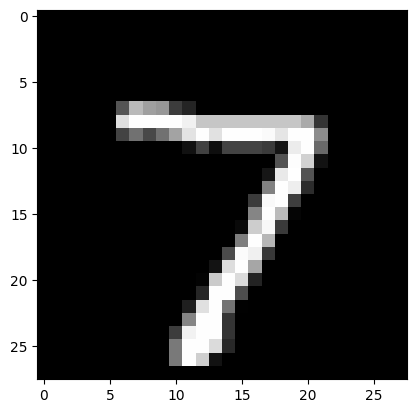

(28, 28, 1)
1/1 [==============================] - 0s 16ms/step
Dígito encontrado       => 7
Dígito real (esparcido) => [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Dígito real (numérico)  => 7


In [68]:
# Recuperamos la primera imagen en su representación matricial de 28x28
x = X_test[0]

print(x.shape) # (28, 28)

# Mostramos la imagen del dígito en escala de grises
plt.imshow(x, cmap=plt.get_cmap('gray'))
plt.show()

# Transformamos la imagen en valores de 0 a 1 para dárselos a la red neuronal
# haciendo también la expansión de dimensión de 28x28 -> 28x28x1
xi = np.expand_dims(x.astype("float32") / 255, -1)

print(xi.shape) # (28, 28, 1)

# Creamos una matriz con una sola muestra para hacer la predicción
x_predict = np.array([xi])

# Obtenemos el vector de tamaño 10, dónde el más cercano a 1 será la categoría predicha
# Por ejemplo, si y_predict = [0, 0, 0, 0, 0, 0, 0, 1, 0, 0], significará que la categoría es 7 
y_predict = model2.predict(x_predict)

# Recuperamos el argumento máximo para pasar el vector de 10 ceros y unos
# a un número escalar con el índice del máximo valor
digit = np.argmax(y_predict, axis=None, out=None)


print("Dígito encontrado       =>", digit)
print("Dígito real (esparcido) =>", y_test[0])
print("Dígito real (numérico)  =>", Y_test[0])

## **Fase 5** - Creación de una matriz que representa un dígito escrito a mano

### Construimos una matriz a mano para representar un dígito

Creamos una matriz de 28x28 que represente un dígito escrito a mano

Podemos usar valores entre 0 y 1, pero en este ejemplo solo se usaron valores cerrados, para no perder la organización y hacer más fácil la visualización, se trata del número `1`.

In [44]:
x = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
])

### Mostramos la matriz del dígito escrito a mano

Mostramos la imagen del dígito que escribimos a mano.

**NOTA:** No se usó la escala de grises, por eso sale en esos colores.

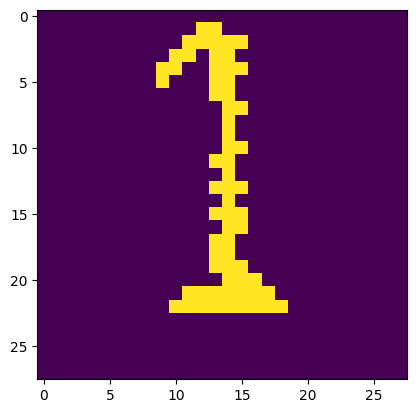

In [45]:
plt.imshow(x)
plt.show()

### Transformamos la matriz del dígito escrito a mano para predecir cuál es

Transformamos la matriz del dígito escrito a mano de `28x28` a la matriz de `28x28x1`.

Observa que ya no es necesario dividir por `255` ya que los valores ya están entre 0 y 1.

In [71]:
# Convetimos `x` (matriz de 28x28) en una matriz de 28x28x1
xi = np.expand_dims(x.astype("float32"), -1)

print(xi.shape) # (28, 28, 1)

# Formamos la matriz de predicción con una sola muestra (`xi`)
x_predict = np.array([xi])

# Predecimos el valor de esa muestra (categoría del dígito)
y_predict = model2.predict(x_predict) # [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]

# Recuperamos el valor numérico de la categoría (7)
digit = np.argmax(y_predict, axis=None, out=None) # 7

print("Dígito encontrado =>", digit) # No es el 1 :( pero estuvimos cerca

(28, 28, 1)
1/1 [==============================] - 0s 19ms/step
Dígito encontrado => 7


**Nota:** En un entrenamiento con 5 épocas se obtuvo el `99%` de precisión, y si logra identificar que es `1` en lugar de `7`.

## **Fase 6** - Crear una aplicación para dibujar dígitos escritos a mano y reconocerlos

### Generamos una aplicación de Tkinter

Usamos Tkinter para generar una pequeña aplicación dónde podremos dibujar un dígito e identificarlo con nuestra red neuronal.

### Instalamos la librería de Tkinter para crear aplicaciones de escritorio

In [ ]:
# ! pip install tk

### Instalamos la librería de Pillow para procesar imágenes

In [ ]:
# ! pip install pillow

### Instalamos Ghostscript para traducir lo dibujado a una imagen

Necesitamos descargar el programa de `Ghostscript` para poder convertir nuestro dibujo hecho a mano en Tkinter a una imagen PNG con Pillow.

[https://ghostscript.com/index.html](https://ghostscript.com/index.html)

En la instalación usamos el directorio `D:\gs\gs10.01.2` para dejar ahí la instalación.


Identificando imagen...
Obteniendo imagen...
Imagen lista :)
Escalando imagen a 28x28...
Imagen escalada a 28x28
Convirtiendo imagen a una matriz de numpy...
Imagen convertida a matriz de 28x28
(28, 28)
Mostrando imagen del dígito...


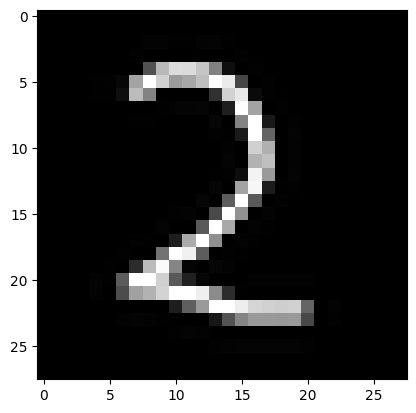

Imagen mostrada :O
Ajustando matriz de 28x28 a 28x28x1...
Matriz de 28x28 convertida a matriz de 28x28x1
(28, 28, 1)
1/1 [==============================] - 0s 47ms/step
Dígito encontrado => 2
Identificando imagen...
Obteniendo imagen...
Imagen lista :)
Escalando imagen a 28x28...
Imagen escalada a 28x28
Convirtiendo imagen a una matriz de numpy...
Imagen convertida a matriz de 28x28
(28, 28)
Mostrando imagen del dígito...


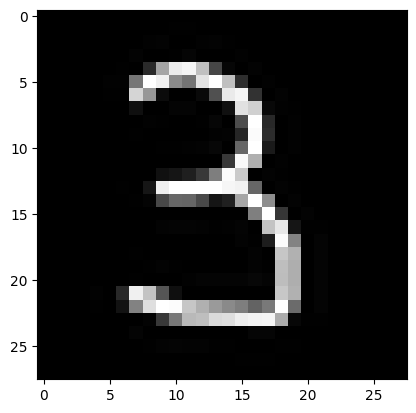

Imagen mostrada :O
Ajustando matriz de 28x28 a 28x28x1...
Matriz de 28x28 convertida a matriz de 28x28x1
(28, 28, 1)
1/1 [==============================] - 0s 41ms/step
Dígito encontrado => 3
Identificando imagen...
Obteniendo imagen...
Imagen lista :)
Escalando imagen a 28x28...
Imagen escalada a 28x28
Convirtiendo imagen a una matriz de numpy...
Imagen convertida a matriz de 28x28
(28, 28)
Mostrando imagen del dígito...


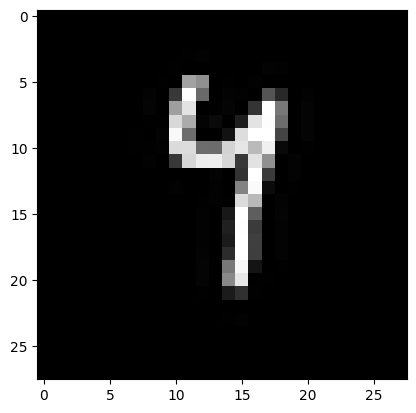

Imagen mostrada :O
Ajustando matriz de 28x28 a 28x28x1...
Matriz de 28x28 convertida a matriz de 28x28x1
(28, 28, 1)
1/1 [==============================] - 0s 64ms/step
Dígito encontrado => 7
Identificando imagen...
Obteniendo imagen...
Imagen lista :)
Escalando imagen a 28x28...
Imagen escalada a 28x28
Convirtiendo imagen a una matriz de numpy...
Imagen convertida a matriz de 28x28
(28, 28)
Mostrando imagen del dígito...


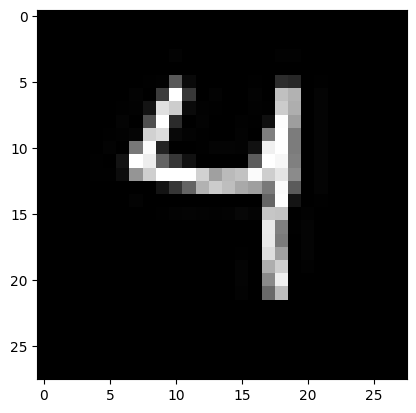

Imagen mostrada :O
Ajustando matriz de 28x28 a 28x28x1...
Matriz de 28x28 convertida a matriz de 28x28x1
(28, 28, 1)
1/1 [==============================] - 0s 44ms/step
Dígito encontrado => 4
Identificando imagen...
Obteniendo imagen...
Imagen lista :)
Escalando imagen a 28x28...
Imagen escalada a 28x28
Convirtiendo imagen a una matriz de numpy...
Imagen convertida a matriz de 28x28
(28, 28)
Mostrando imagen del dígito...


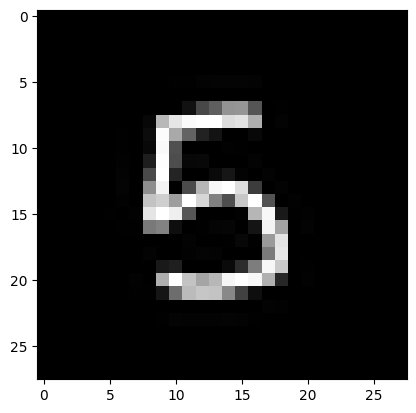

Imagen mostrada :O
Ajustando matriz de 28x28 a 28x28x1...
Matriz de 28x28 convertida a matriz de 28x28x1
(28, 28, 1)
1/1 [==============================] - 0s 45ms/step
Dígito encontrado => 5
Identificando imagen...
Obteniendo imagen...
Imagen lista :)
Escalando imagen a 28x28...
Imagen escalada a 28x28
Convirtiendo imagen a una matriz de numpy...
Imagen convertida a matriz de 28x28
(28, 28)
Mostrando imagen del dígito...


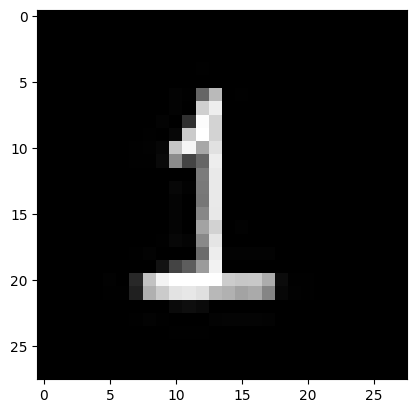

Imagen mostrada :O
Ajustando matriz de 28x28 a 28x28x1...
Matriz de 28x28 convertida a matriz de 28x28x1
(28, 28, 1)
1/1 [==============================] - 0s 49ms/step
Dígito encontrado => 1
Identificando imagen...
Obteniendo imagen...
Imagen lista :)
Escalando imagen a 28x28...
Imagen escalada a 28x28
Convirtiendo imagen a una matriz de numpy...
Imagen convertida a matriz de 28x28
(28, 28)
Mostrando imagen del dígito...


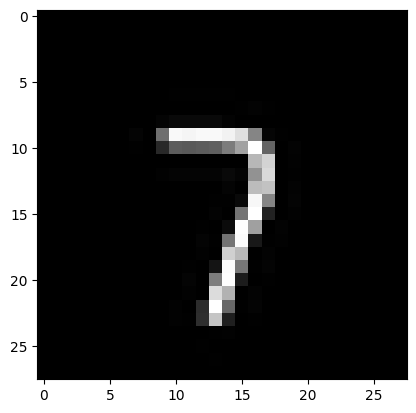

Imagen mostrada :O
Ajustando matriz de 28x28 a 28x28x1...
Matriz de 28x28 convertida a matriz de 28x28x1
(28, 28, 1)
1/1 [==============================] - 0s 44ms/step
Dígito encontrado => 7
Identificando imagen...
Obteniendo imagen...
Imagen lista :)
Escalando imagen a 28x28...
Imagen escalada a 28x28
Convirtiendo imagen a una matriz de numpy...
Imagen convertida a matriz de 28x28
(28, 28)
Mostrando imagen del dígito...


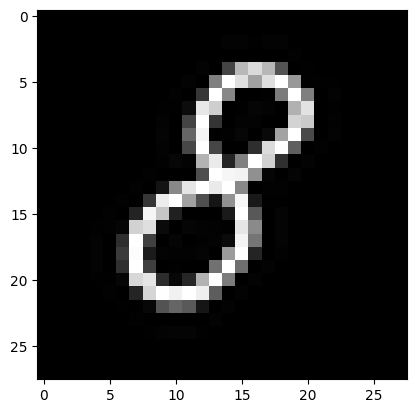

Imagen mostrada :O
Ajustando matriz de 28x28 a 28x28x1...
Matriz de 28x28 convertida a matriz de 28x28x1
(28, 28, 1)
1/1 [==============================] - 0s 46ms/step
Dígito encontrado => 8
Identificando imagen...
Obteniendo imagen...
Imagen lista :)
Escalando imagen a 28x28...
Imagen escalada a 28x28
Convirtiendo imagen a una matriz de numpy...
Imagen convertida a matriz de 28x28
(28, 28)
Mostrando imagen del dígito...


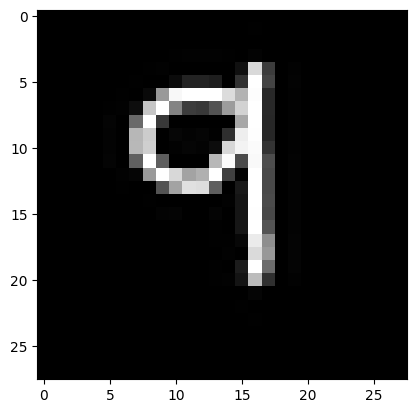

Imagen mostrada :O
Ajustando matriz de 28x28 a 28x28x1...
Matriz de 28x28 convertida a matriz de 28x28x1
(28, 28, 1)
1/1 [==============================] - 0s 46ms/step
Dígito encontrado => 9
Identificando imagen...
Obteniendo imagen...
Imagen lista :)
Escalando imagen a 28x28...
Imagen escalada a 28x28
Convirtiendo imagen a una matriz de numpy...
Imagen convertida a matriz de 28x28
(28, 28)
Mostrando imagen del dígito...


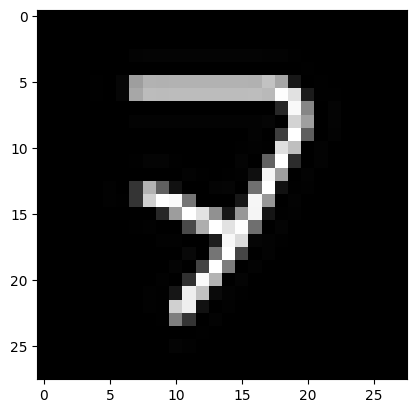

Imagen mostrada :O
Ajustando matriz de 28x28 a 28x28x1...
Matriz de 28x28 convertida a matriz de 28x28x1
(28, 28, 1)
1/1 [==============================] - 0s 51ms/step
Dígito encontrado => 7
Identificando imagen...
Obteniendo imagen...
Imagen lista :)
Escalando imagen a 28x28...
Imagen escalada a 28x28
Convirtiendo imagen a una matriz de numpy...
Imagen convertida a matriz de 28x28
(28, 28)
Mostrando imagen del dígito...


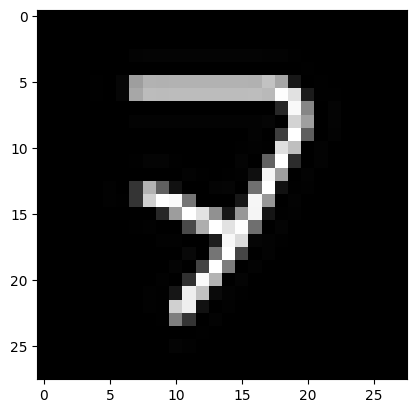

Imagen mostrada :O
Ajustando matriz de 28x28 a 28x28x1...
Matriz de 28x28 convertida a matriz de 28x28x1
(28, 28, 1)
1/1 [==============================] - 0s 44ms/step
Dígito encontrado => 7


In [72]:
#
# ==================================================================================
#    Aplicación de Tkinter para reconocimiento de dígitos escritos a mano
#    Usando Redes Neuronales Convolucionales (CNN - Convolutional Neural Network)
# ==================================================================================
#
# Instituto Politécnico Nacional
# Centro de Investigación en Computación
#
# Curso de Machine Learning (Julio de 2023)
#
# Profesor: Alan Badillo Salas
# Correo: alan@nomadacode.com
#

# Importamos todos los componentes de Tkinter
from tkinter import *

# Definimos las variables globales que estaremos utilizando

# Retiene la aplicación de Tkinter
app = None
# Retiene el componente Canvas sobre el que dibujaremos
canvas = None

# Retiene la imagen dibujada en el Canvas
image = None

# Retiene el identificador de la línea dibujada
line = None
# Retiene los puntos dibujados
line_points = []

# Crea una aplicación de Tkinter
def create_app():
    # Permite modificar la variable global `app`
    global app

    # Crea una nueva aplicación de Tkinter
    app = Tk()

    # Manda a crear el Canvas
    create_canvas()
    # Manda a crear los botones
    create_buttons()

    # Retiene la aplicación hasta que se cierre
    app.mainloop()

# Construye los botones
def create_buttons():
    # Crea el botón identificar que llamará a la función `digit_identifier` al ser pulsado
    image_get_button = Button(app, text="Identificar", command=digit_identifier)
    image_get_button.pack(pady=20)
    
    # Crea el botón guardar que llamará a la función `image_save` al ser pulsado
    image_save_button = Button(app, text="Guardar", command=image_save)
    image_save_button.pack(pady=20)

    # Crea el botón borrar que llamará a la función `canvas_clear` al ser pulsado
    canvas_clear_button = Button(app, text="Borrar", command=canvas_clear)
    canvas_clear_button.pack(pady=20)

# Crea el Canvas sobre la aplicación
def create_canvas():
    # Permite modificar la variable global `canvas`
    global canvas
    
    # Crea un Canvas de 280x280 pixeles
    canvas = Canvas(app, width=280, height=280, bg="white")
    # Hace la construcción
    canvas.pack()

    # Enlaza el evento de clic al botón principal del mouse y llama a la función `draw_start`
    canvas.bind('<Button-1>', draw_start)
    # Enlaza el evento de cuando se mueve el mouse y llama a la función `draw_line`
    canvas.bind('<B1-Motion>', draw_line)
    # Enlaza el evento de liberación de clic al botón principal del mouse y llama a la función `draw_end`
    canvas.bind('<ButtonRelease-1>', draw_end)

# Borra el dibujo del Canvas
def canvas_clear():
    canvas.delete("all")

# Agrega el primer punto a la lista de puntos (tomado del mouse)
# Este se manda a llamar cuando pulsamos clic
def draw_start(event):
    line_points.extend((event.x, event.y))

# Dibuja el siguiente punto mientras se mueva el mouse
def draw_line(event):
    # Permite modificar la variable global `line`
    global line
    
    # Agrega el siguiente punto a la lista (extraído del mouse)
    line_points.extend((event.x, event.y))

    # Si la línea está creada (no es None)
    if line is not None:
        # Elimina la línea del canvas para no repetirla
        canvas.delete(line)

    # Crea líneas que unen todos nuestros puentos con grosor 12 en color negro
    line = canvas.create_line(line_points, width=12, fill="black")

# Termina el dibujo sobre el Canvas
# Este se manda a llamar cuándo dejamos de pulsar clic
def draw_end(event=None):
    # Permite modificar la variable global `line`
    global line

    # Limpia la última línea
    line = None
    # Limpia los puntos dibujados (ya quedaron sobre el Canvas dibujados)
    line_points.clear()    

# Obtiene la imagen PNG desde el Canvas
def image_get():
    # Permite modificar la variable global `image`
    global image

    print("Obteniendo imagen...")

    # Importamos los componentes de la librería Pillow
    from PIL import Image
    from PIL import EpsImagePlugin
    import io
    
    # Establecemos dónde está nuestro traductor `Ghostscript`
    EpsImagePlugin.gs_windows_binary =  r"D:\gs\gs10.01.2\bin\gswin64c.exe"

    # Actualizamos el Canvas
    canvas.update()
    
    # Recuperamos el dibujo sobre el cambas en formato `postscript`
    ps = canvas.postscript()

    # Traducimos el dibujo a una imagen de `Pillow`
    image = Image.open(io.BytesIO(ps.encode("utf-8")))

    print("Imagen lista :)")

# Guarda la imagen en un archivo llamado `imagen.png`
def image_save():
    print("Guardando imagen...")

    # Recupera la imagen del Canvas
    image_get()
    # Guarda la imagen en el archivo `imagen.png`
    image.save("imagen.png", "png")
    
    print("Imagen guardada :D")

# Muestra la imagen de un dígito desde su matriz de 28x28
def show_digit(x):
    # Importamos pyplot de la librería Matplolib
    import matplotlib.pyplot as plt

    # Mostramos la imagen del dígito en escala de grises
    plt.imshow(x, cmap=plt.get_cmap('gray'))
    plt.show()

# Identificamos el dígito dibujado en el Canvas
def digit_identifier():
    print("Identificando imagen...")

    # Recuperamos la imagen del dígito dibujado
    image_get()

    print("Escalando imagen a 28x28...")
    
    # Importamos Image de Pillow
    from PIL import Image

    # Obtenemos la imagen escalada a 28x28 pixeles (la original es de 280x280)
    # En escala de grises (un solo canal de color `L`)
    image_scaled = image.resize((28, 28), Image.LANCZOS).convert("L")

    print("Imagen escalada a 28x28")

    print("Convirtiendo imagen a una matriz de numpy...")

    # Importamos numpy para convertir la imagen a una matriz
    import numpy as np

    # Convertimos la imagen escalada de 28x28 a una matriz de 28x28
    # Invertimos el color de blanco a negro (pintamos en negro y es al revés)
    x = 255 - np.array(image_scaled)

    print("Imagen convertida a matriz de 28x28")

    print(x.shape) # (28, 28)

    print("Mostrando imagen del dígito...")

    # Mostramos el dígito dibujado desde su matriz
    show_digit(x)

    print("Imagen mostrada :O")

    print("Ajustando matriz de 28x28 a 28x28x1...")

    # Reconstruimos la matriz expandida y normalizada a valores de 0 a 1 (en lugar de 0 a 255)
    xi = np.expand_dims(x.astype("float32") / 255, -1)

    print("Matriz de 28x28 convertida a matriz de 28x28x1")

    print(xi.shape) # (28, 28, 1)

    # Importamos el modelo de la red neuronal ya entrenada para reconocer dígitos escritos a mano
    model = keras.models.load_model("digits_net_model")

    # Cargamos los pesos de entrenamiento (los que ya se ajustaron y guardaron tras el entrenamiento)
    model.load_weights("digit_net_weights")

    # Creamos la matriz de predicción con una sola muestra
    x_predict = np.array([xi])

    # Obtenemos el valor de predicción de nuestro dígito escrito a mano
    y_predict = model.predict(x_predict)

    # Obtenemos la categoría del dígito en su valor numérico (no la matriz de 10 categorías)
    digit = np.argmax(y_predict, axis=None, out=None)

    # Imprimimos qué dígito fue encontrado
    print("Dígito encontrado =>", digit)

# Mandamos a contruir la aplicación
create_app()